# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [143]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [144]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units="metric"
query_url = f'{url}appid={weather_api_key}&units={units}&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    city_response = requests.get(city_url)
    city_json = city_response.json()
    # pprint(city_json)
    

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_json['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | island harbour
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | jeddah
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | mana
Processing Record 10 of Set 1 | lagoa formosa
Processing Record 11 of Set 1 | tema
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | upleta
Processing Record 14 of Set 1 | pambujan
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | mount isa
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing Record 22 of Set 1 | haiku-pauwela
Processing 

In [145]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [146]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,georgetown,5.4112,100.3354,32.96,74,20,5.14,MY,1682498113
1,bethel,41.3712,-73.4140,5.64,81,0,0.00,US,1682498366
2,ushuaia,-54.8000,-68.3000,7.81,53,20,7.20,AR,1682498367
3,island harbour,50.7240,-1.2758,10.17,80,99,5.81,GB,1682498368
4,carnarvon,-24.8667,113.6333,21.65,50,0,7.91,AU,1682498131


In [147]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [148]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,32.96,74,20,5.14,MY,1682498113
1,bethel,41.3712,-73.4140,5.64,81,0,0.00,US,1682498366
2,ushuaia,-54.8000,-68.3000,7.81,53,20,7.20,AR,1682498367
3,island harbour,50.7240,-1.2758,10.17,80,99,5.81,GB,1682498368
4,carnarvon,-24.8667,113.6333,21.65,50,0,7.91,AU,1682498131


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

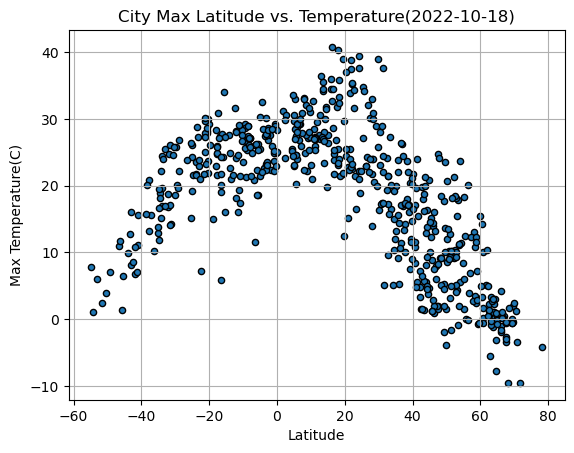

In [149]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat','Max Temp',kind = 'scatter',edgecolors='black')

# Incorporate the other graph properties
# plt.xlim(-62,82)
# plt.ylim(-25,45)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs. Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

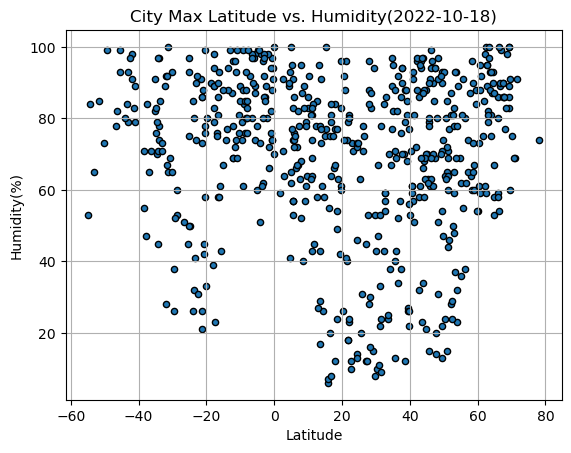

In [150]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat','Humidity',kind = 'scatter',edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Max Latitude vs. Humidity(2022-10-18)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

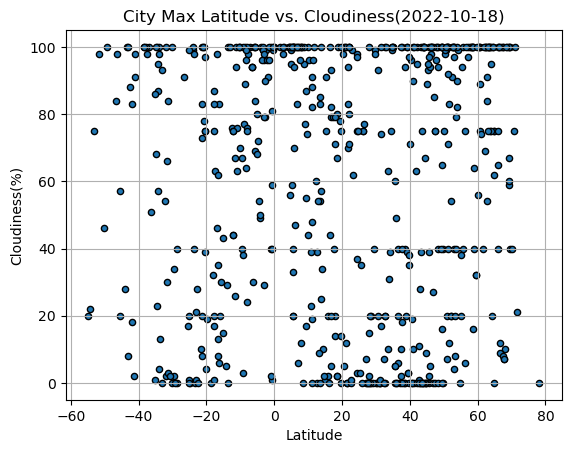

In [151]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat','Cloudiness',kind = 'scatter',edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Max Latitude vs. Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

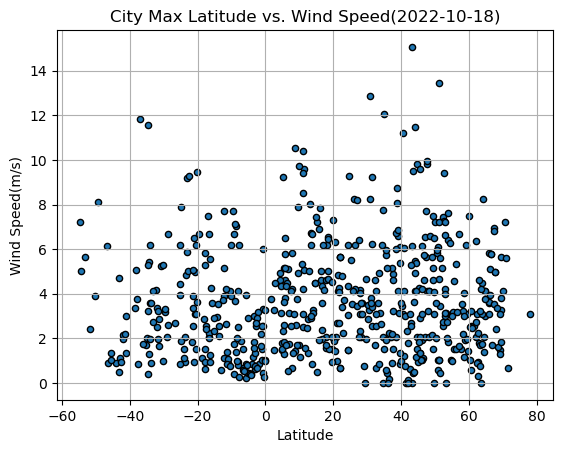

In [152]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat','Wind Speed',kind = 'scatter',edgecolors='black')


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Max Latitude vs. Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [153]:
# Define a function to create Linear Regression plots
def hemisphere(df,y):
    plt.cla()
    x_values = df['Lat']
    y_values = df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (np.mean(x_values), np.mean(y_values)), fontsize=14, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()


In [154]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,georgetown,5.4112,100.3354,32.96,74,20,5.14,MY,1682498113
1,bethel,41.3712,-73.4140,5.64,81,0,0.00,US,1682498366
3,island harbour,50.7240,-1.2758,10.17,80,99,5.81,GB,1682498368
5,jeddah,21.5169,39.2192,33.92,40,0,4.12,SA,1682498252
8,mana,5.6592,-53.7767,24.64,91,100,3.82,GF,1682498373


In [155]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,7.81,53,20,7.20,AR,1682498367
4,carnarvon,-24.8667,113.6333,21.65,50,0,7.91,AU,1682498131
6,papatowai,-46.5619,169.4708,10.90,78,84,6.14,NZ,1682498371
7,adamstown,-25.0660,-130.1015,24.36,75,1,4.44,PN,1682498371
9,lagoa formosa,-18.7786,-46.4075,15.01,90,0,1.13,BR,1682498374


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7146086910205625


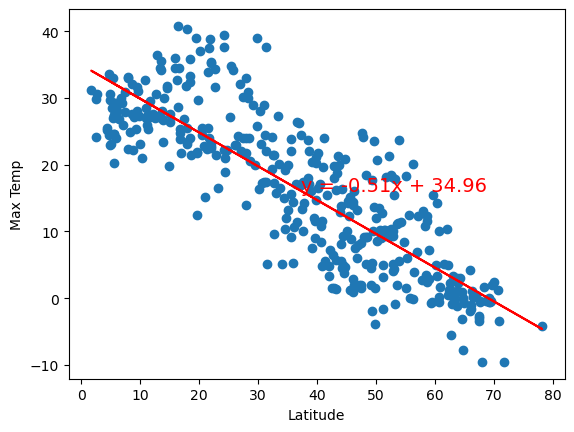

In [156]:
# Linear regression on Northern Hemisphere
hemisphere(northern_hemi_df,'Max Temp')

The r-squared is: 0.4892235602105476


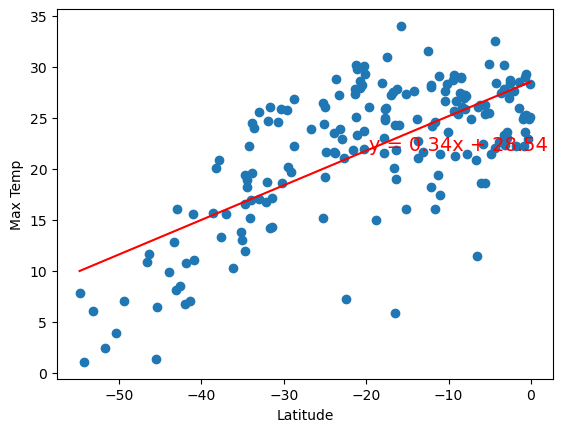

In [157]:
# Linear regression on Southern Hemisphere
hemisphere(southern_hemi_df,'Max Temp')

**Discussion about the linear relationship:** For northern hemisphere, the r-squared between latitude and max temperature is negative, which means the larger the latitude, the lower the max temperature; However, in southern hemishpere, the r-squared between latitude and max temperature is positive, which means when latitude increase, max temperature tend to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0307229310649816


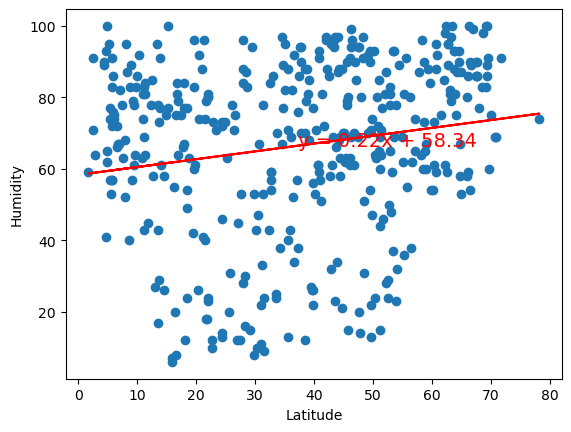

In [158]:
# Northern Hemisphere
hemisphere(northern_hemi_df,'Humidity')

The r-squared is: 0.02601433137321141


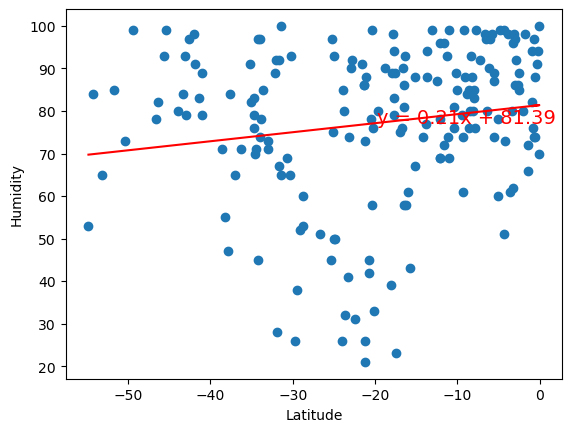

In [159]:
# Southern Hemisphere
hemisphere(southern_hemi_df,'Humidity')

**Discussion about the linear relationship:** For both northern and southern hemisphere, r-squared are both around 0.03, which is really close to 0, which means there is no correlation between humidity level and city position.



### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.004462229084436384


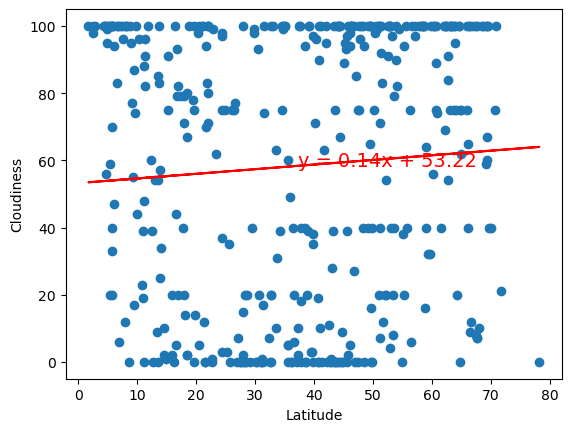

In [160]:
# Northern Hemisphere
hemisphere(northern_hemi_df,'Cloudiness')

The r-squared is: 0.02954242820982143


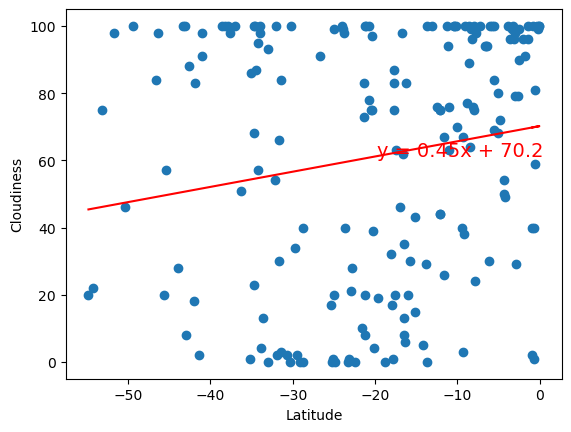

In [161]:
# Southern Hemisphere
hemisphere(southern_hemi_df,'Cloudiness')

**Discussion about the linear relationship:** Both r-squared are very small and close to 0, There are no correlations between cloudiness and the cities’ positions.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004468374195031943


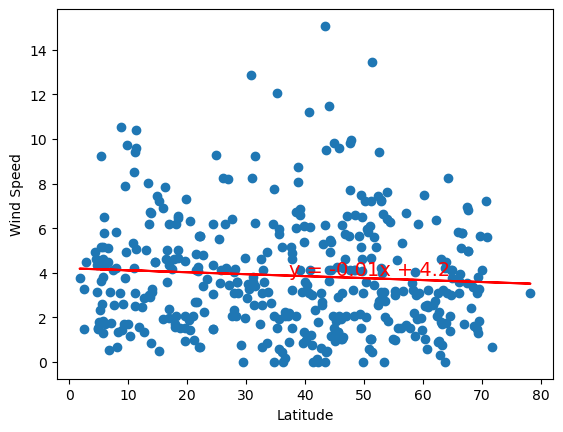

In [162]:
# Northern Hemisphere
hemisphere(northern_hemi_df,'Wind Speed')

The r-squared is: 0.05852682513780239


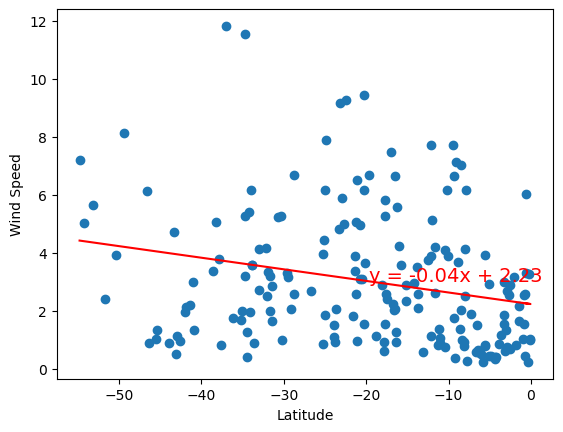

In [163]:
# Southern Hemisphere
hemisphere(southern_hemi_df,'Wind Speed')

**Discussion about the linear relationship:** For both northern and southern hemisphere, r-squared are both really close to 0, which means there is no correlation between wind speed and city position.

